# Directed Graphs, Degree Distribution and Sampling
### Contents:
1. Creating simple graphs
2. Importing a dataset with directed and weighted edges 
3. Connectivity in Directed Graphs
4. Degree Distribution
5. Converting the graph to an undirected 
6. Sampling Revisited

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Creating a simple undirected graph

In [2]:
edges = [(1, 2), (1, 6), (2, 3), (2, 4), (2, 6), 
         (3, 4), (3, 5), (4, 8), (4, 9), (6, 7)]

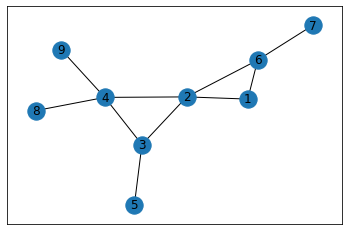

In [3]:
G_basic = nx.Graph()
G_basic.add_edges_from(edges)
nx.draw_networkx(G_basic, with_labels = True)

### Creating a simple undirected weighted graph

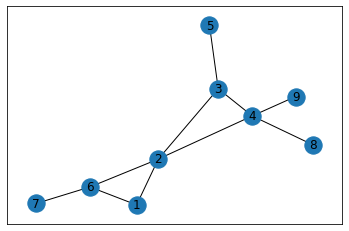

In [4]:
G_weighted = nx.Graph()
  
edges = [(1, 2, 19), (1, 6, 15), (2, 3, 6), (2, 4, 10), 
         (2, 6, 22), (3, 4, 51), (3, 5, 14), (4, 8, 20),
         (4, 9, 42), (6, 7, 30)]
  
G_weighted.add_weighted_edges_from(edges)
nx.draw_networkx(G_weighted, with_labels = True)

In [5]:
print(list(G_weighted.edges(data = True)))

[(1, 2, {'weight': 19}), (1, 6, {'weight': 15}), (2, 3, {'weight': 6}), (2, 4, {'weight': 10}), (2, 6, {'weight': 22}), (6, 7, {'weight': 30}), (3, 4, {'weight': 51}), (3, 5, {'weight': 14}), (4, 8, {'weight': 20}), (4, 9, {'weight': 42})]


### Creating a simple directed graph

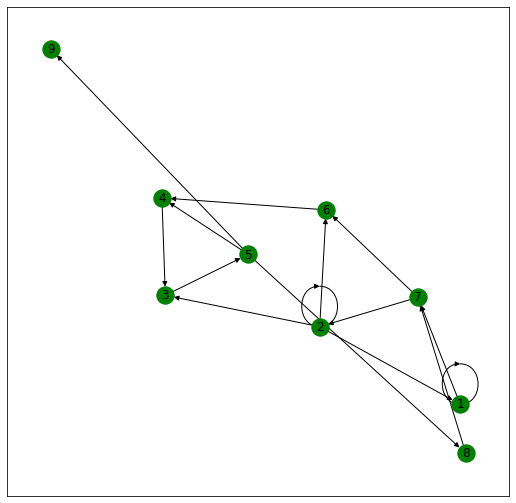

In [6]:
G_directed = nx.DiGraph()
G_directed.add_edges_from([(1, 1), (1, 7), (2, 1), (2, 2), (2, 3), 
                  (2, 6), (3, 5), (4, 3), (5, 4), (5, 8),
                  (5, 9), (6, 4), (7, 2), (7, 6), (8, 7)])
  
plt.figure(figsize =(9, 9))
nx.draw_networkx(G_directed, with_labels = True, node_color ='green')

### Importing a dataset with directed and weighted edges 
#### About the dataset - Example of a trust distrust network
- Who-trusts-whom network of people who trade using Bitcoin on the platform: Bitcoin Alpha. 
- Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. 
- Members of Bitcoin Alpha rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. <br> 

For more datasets visit https://snap.stanford.edu/data/index.html

In [7]:
fname = 'soc-sign-bitcoinalpha.csv'
cols = ['source', 'target', 'weight', 'time']
df = pd.read_csv(fname, names=cols, header=None)
df['time'] = pd.to_datetime(df.time * 1e9)
df.shape

(24186, 4)

In [8]:
df.head(10)

,source,target,weight,time
0,7188,1,10,2014-08-08 04:00:00
1,430,1,10,2013-08-15 04:00:00
2,3134,1,10,2013-05-28 04:00:00
3,3026,1,10,2012-10-12 04:00:00
4,3010,1,10,2012-09-17 04:00:00
5,804,1,10,2012-05-21 04:00:00
6,160,1,10,2014-03-13 04:00:00
7,95,1,9,2013-11-16 05:00:00
8,377,1,7,2014-10-31 04:00:00
9,888,1,7,2013-04-11 04:00:00


In [9]:
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr = 'weight' , create_using=nx.DiGraph())
n,e = G.order(), G.size()
ave_degree = float(e)/n
trans=nx.transitivity(G)

In [10]:
print ("Nodes: ", n)
print ("Edges: ", e)
print ("Average degree: ", ave_degree)
print ("Trasitivity: ", trans)

Nodes:  3783
Edges:  24186
Average degree:  6.393338620142744
Trasitivity:  0.06356526410026858


In [11]:
G.number_of_nodes() # also g.order()

3783

In [12]:
G.number_of_edges() # also g.size()

24186

### Before we move further, we will review the dictionary concept in Python.

In [13]:
# Python dictionaries:

# Keys and values can be of any data type
fruit_dict = {"apple":1, "orange":[0.23,0.11], 42:True}

# Can retrieve the keys and values as Python lists (vector)
fruit_dict.keys() 

dict_keys(['apple', 'orange', 42])

In [14]:
# Or create a (key,value) tuple
fruit_dict.items() 

dict_items([('apple', 1), ('orange', [0.23, 0.11]), (42, True)])

Any NetworkX graph behaves like a Python dictionary with nodes as primary keys.

### Connectivity in Directed Graphs

In [15]:
nx.is_strongly_connected(G)

False

In [16]:
nx.number_strongly_connected_components(G)

540

In [17]:
nx.is_weakly_connected(G)

False

In [18]:
nx.number_weakly_connected_components(G)

5

In [19]:
[len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]

[3235,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 

In [20]:
all_comp = (G.subgraph(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True))
Gsc = list(all_comp)[0]
Gsc.number_of_nodes(), Gsc.number_of_edges()

(3235, 23299)

In [21]:
[len(c) for c in sorted(nx.weakly_connected_components(G),key=len, reverse=True)]

[3775, 2, 2, 2, 2]

In [22]:
all_comp = (G.subgraph(c) for c in nx.weakly_connected_components(G))
Gwc = list(all_comp)[0]
Gwc.number_of_nodes(), Gwc.number_of_edges()

(3775, 24180)

### Degree Distribution

<img src="log.png" alt="log scale" title="Log Explained" />

In [23]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list 
        A list of frequencies of degrees.
        The degree values are the index in the list.

    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
        
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
        
    else:
        degseq=[v for k, v in G.degree()]
        
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

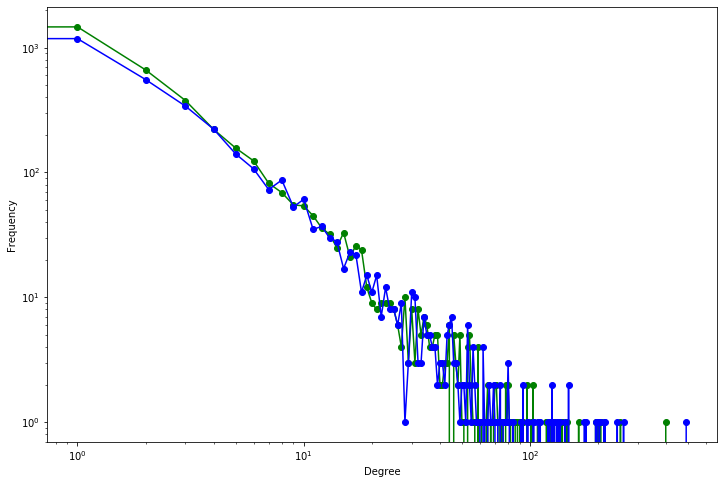

In [24]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

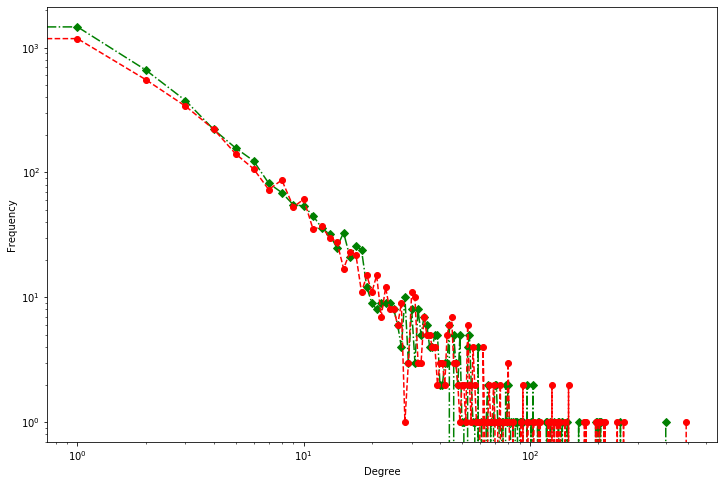

In [25]:
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'gD-.', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'ro--', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

See more plotting options in this link.
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### Converting the graph to an undirected 

In [26]:
# Now, we will convert the graph to an undirected network and extract the giant connected component
# then we will compute node centrality measures.

UG = G.to_undirected()

UG_componenets = (UG.subgraph(c) for c in nx.connected_components(UG))
UG_gc = list(UG_componenets)[0]

In [27]:
num_nodes = UG_gc.order()
num_nodes

3775

In [28]:
type(UG_gc)

networkx.classes.graph.Graph

### Sampling Revisited

In [29]:
# let's see how hte nodes are represented in Bitcoin dataset
sorted(UG_gc)[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Note that they are consecutive integers however they don't start with zero. So we have to relabel them.

In [30]:
mapping = dict(zip(UG_gc, range(0, num_nodes)))
UG_gc = nx.relabel_nodes(UG_gc, mapping)
sorted(UG_gc)[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
from littleballoffur import ForestFireSampler
sampler = ForestFireSampler(number_of_nodes=500)

new_sample = sampler.sample(UG_gc)

/Users/ghadaamoudi/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
n,e = new_sample.order(), new_sample.size()
ave_degree = float(e)/n
trans = nx.transitivity(new_sample)
print ("Nodes: ", n)
print ("Edges: ", e)
print ("Average degree: ", ave_degree)
print ("Transitivity: ", trans)

Nodes:  500
Edges:  3599
Average degree:  7.198
Transitivity:  0.21465645639320585


Text(0, 0.5, 'Frequency')

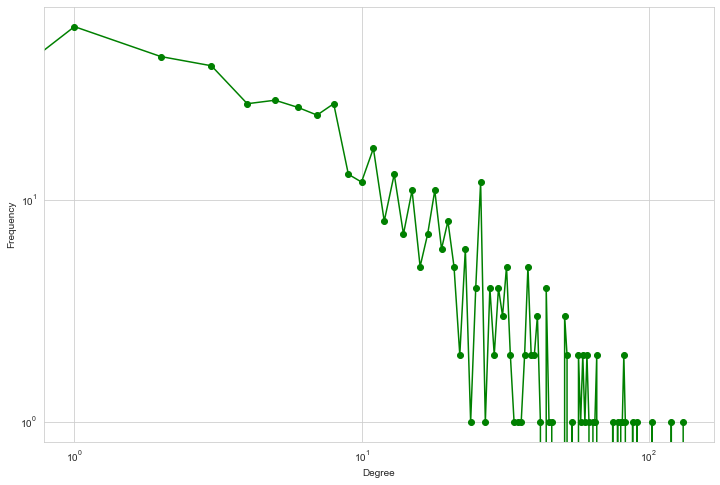

In [33]:
degree_freq = degree_histogram_directed(new_sample)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq, 'go-', label='degree') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

# Your Turn

In [34]:
# 1. Using G_directed graph created above, find the nuber of nodes and edges in this graph. to answer 


In [35]:
# 2. Check whether the graph is strongly/weakly connected. (2 statements)


In [36]:
# 3. Find in-degree, out-degree of all nodes.


In [37]:
# 4. Find the number of strongly connected components in G_directed.


In [38]:
# 5. Find the number of weakly connected components in G_directed.


6. Explain in your own words what is a degree distribution?

7. Explain in your own words what is a log scale and why do we use it?

8. Can you give another real-life example of trust distrust network?

9. Why did we find the degree distribution and the transititvity of the sampled graph?


10. Given the bitcoin dataset above think of one interesting information you can obtain from this dataset.

**Bonus question:**
Can you come up with an algorithm that uses the Littlebaloffur library to sample a directed graph? Just write the psudo code (plain English steps).